In [2]:
#This piecce of code is used in order to create a function to read in the dataset every time
#The reason we use a function to do this rather than manually downloading the data is so we are able to fetch the latest data
#also you can install the dataset on multiple machines

#These are the inouts you would need
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request


def load_housing_data():
    #This is meant to assign the value of the file 
    tarball_path = Path("datasets/housing.tgz")
    #This is kinda like a try catch 
    if not tarball_path.is_file():
        #Firstly it creates a path object. The path object has the method mkdir
        #The mkdir is a method used to create directory at that path.
        #When you assign parents to tru your saying create the parent directories
        # example Path("a/b/c") would also create the parent directories a and b whilst createing the directories c
        #without it it would create an error
        # the exists_ok checks if fthere is duplicate and basically prevents an error in cans there is a duplicate        
        Path("datasets").mkdir(parents= True , exists_ok = True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        #This opens a url and saves it in the variable tarball_path
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path = 'datasets')
    #This returns a dataframe 
    return pd.read_csv(Path("datasets/housing/housing.csv"))

#Assigning housing to the return value of the functiokn
#In this case it is a csv file
housing = load_housing_data()

In [3]:
#Gives you the top 5 rows of the dataset
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
#Gives you information about the dataframe.
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
#First select the array you want to check
#This checks the amounts of groups in a specific array
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [6]:
#This gives you numerical attributes about the dataset
#null values are ignored. e.g. there are 20433 count of total bedrooms the other 207 is 
#This is used to get a feel fo the type of data you are plotting
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

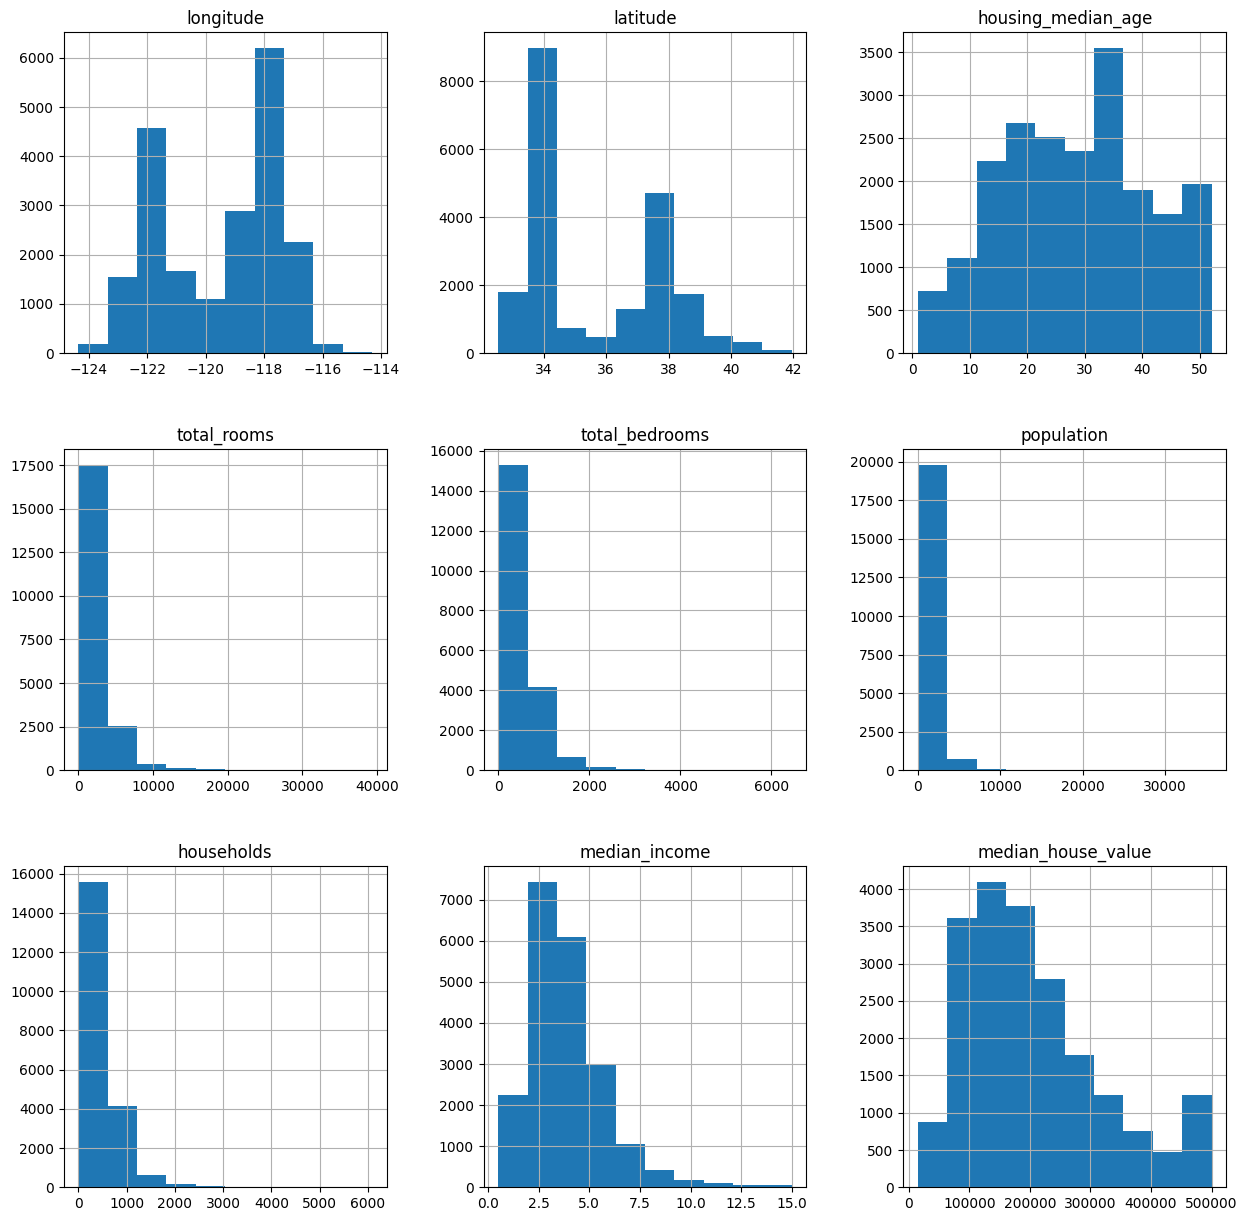

In [9]:
#This is another way to get a feel of the data you are plotting
housing.hist(figsize=[15 , 15])

In [ ]:
#In this section we will be creating a test set
import numpy as np

#Besically creates a set of random numbers
#Splits the data valiable in a ratio of test ratio and splits the random number by the ratio
#uses iloc to get the values of those variables set to the random numbers
def shuffle_and_split__data(data , test_ratio):
    #This creates a 1d array with random number.
    #The amount fof numbers is dependent on the length of thed data inputted
    #The numbers are also unordered. This will be useful for later code
    shuffled_indices = np.random.permutation(len(data))
    #This is self explanitory
    #Used to get a percentage of the amounf of the data you want 
    test_set_size = int(len(data) * test_ratio)
    #The array shufeled indices holds an array of numbers up to the length of the data your working with
    #What we are doing here is splitting the array into 2 separate arrays 
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    #This uses the iloc method to create 2 arrays    
    #When u pass in an array into an iloc function it gets the values for those indices
    #It then return those values in the indices 
    return data.iloc[train_indices] , data.iloc[test_indices]

In [ ]:
train_set , test_set = shuffle_and_split__data(housing , 0.2)

In [ ]:
from zlib import crc32
def is_id_in_test_set(identifier , test_ratio):
    return(crc32(np.int64(identifier)) < test_ratio * 2**32)

def split_data_with_id_hash(data , test_ratio , id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_:is_id_in_test_set(id_,test_ratio))
    return data.loc[~in_test_set] , data.loc[in_test_set]
